In [2]:
import os
import xml.etree.ElementTree as ET

import numpy as np

import matplotlib
matplotlib.use("agg")

In [3]:
xml_data = 'simple_wall_geom.xml'
name, _ = os.path.splitext(xml_data)

In [4]:
with open(xml_data, 'rt') as f:
    tree = ET.parse(f)

In [28]:
walls = []
for wall in tree.getroot():
    w = dict()
    w['ID'] = wall.find("ID").text
    w['type'] = wall.find("type").text
    w['height'] = wall.find("height").text 
    polygon = wall.find("polygon")
    points = polygon.findall("point")
    w['polygon'] = np.empty((len(points),3))
    for i, point in enumerate(points):
        w['polygon'][i] = [point.find(p).text for p in ["X","Y","Z"]]
    walls.append(w)

In [29]:
#just to see what's in xml
import pandas as pd
df = pd.DataFrame(walls)
df.head()

,ID,height,polygon,type
0,163917,42.666666666648,"[[-133.129758023, -316.634077957, 0.0], [-133....",Exterior - S6 - Brick 2
1,163918,42.666666666648,"[[-133.129758023, -292.613244624, 0.0], [-149....",Exterior - S6 - Brick 2
2,163919,42.666666666648,"[[-149.525591357, -292.613244624, 0.0], [-149....",Exterior - S6 - Brick 2
3,163921,42.666666666648,"[[-53.29642469, -273.446862558, 0.0], [-53.296...",Exterior - S6 - Brick 2
4,163922,42.666666666648,"[[-53.29642469, -292.613570145, 0.0], [-71.629...",Exterior - S6 - Brick 2


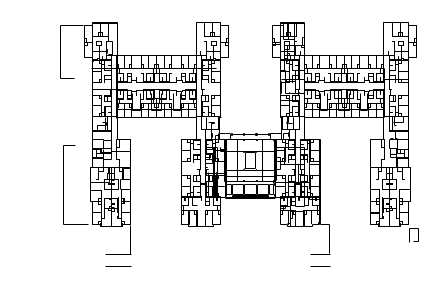

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections

#mess with figsize to figure out resolution
fig, ax = plt.subplots()

#for wall_type in df['type'].unique():
#    walls = df[df['type'] == wall_type]
for xyz in df['polygon']:
    ax.fill(xyz[:,0], xyz[:,1], color='k')

ax.axis('off')
fig.tight_layout(pad=0)

In [52]:
fig.canvas.draw()
tab = fig.canvas.copy_from_bbox(fig.bbox).to_string_argb()
ncols, nrows = fig.canvas.get_width_height()
data = np.fromstring(tab, dtype = np.uint8).reshape(nrows, ncols, 4)

In [53]:

from PIL import Image

In [54]:
im = Image.fromarray(data)
im.save("{}.pgm".format(name))

In [62]:
walls = []
for wall in tree.getroot():
    points = wall.find("polygon").findall("point")
    wall = np.empty((len(points),2))
    for i, point in enumerate(points):
        wall[i] = [point.find("X").text, point.find("Y").text] 
    walls.append(wall)

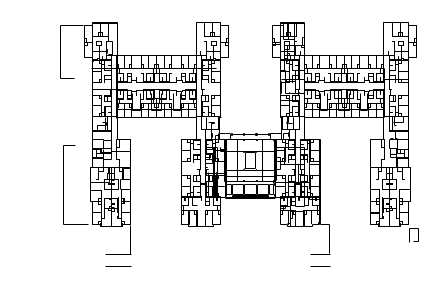

In [65]:
fig, ax = plt.subplots()

for wall in walls :
    ax.fill(wall[:,0], wall[:,1], color='k')

ax.axis('off')
fig.tight_layout(pad=0)

In [66]:
fig.canvas.draw()
tab = fig.canvas.copy_from_bbox(fig.bbox).to_string_argb()
ncols, nrows = fig.canvas.get_width_height()
data = np.fromstring(tab, dtype = np.uint8).reshape(nrows, ncols, 4)

In [67]:
im = Image.fromarray(data)
im.save("{}.pgm".format(name))